In [35]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import incense
from incense import ExperimentLoader

In [36]:
loader = ExperimentLoader(
    mongo_uri='localhost:27017',
    db_name='experiments'
)

In [37]:
experiments = loader.find_by_ids([1, 2, 3, 4, 5])
print('\n'.join(map(str, experiments)))

Experiment(id=1, name=house_prices_sklearn)
Experiment(id=2, name=house_prices_sklearn)
Experiment(id=3, name=house_prices_sklearn)
Experiment(id=4, name=house_prices_xgboost)
Experiment(id=5, name=house_prices_xgboost)


In [38]:
experiments[0].result

pmap({'py/object': 'numpy.float64', 'dtype': 'float64', 'value': 19503.600958904113})

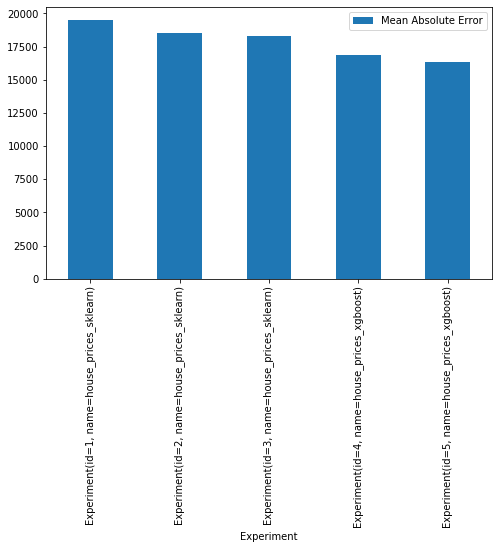

In [39]:
pd.DataFrame([(str(exp), exp.result['value']) for exp in experiments], columns=['Experiment', 'Mean Absolute Error']) \
    .set_index('Experiment').plot(kind='bar', figsize=(8, 5))

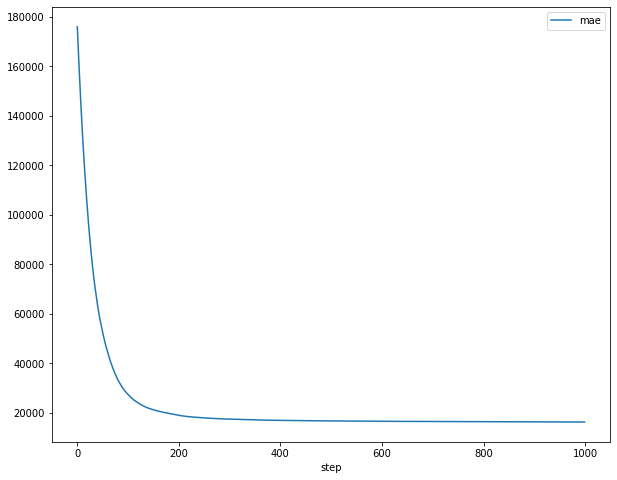

In [40]:
experiments[4].metrics['mae'].plot(figsize=(10, 8))
plt.legend()

In [85]:
experiments[4].to_dict()['config']

{'categorical_cols': ['MSSubClass',
  'MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'Exterior1st',
  'Foundation',
  'SaleCondition'],
 'depth': 3,
 'numerical_cols': ['LotFrontage',
  'LotArea',
  'OverallQual',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'],
 'target_col': 'SalePrice',
 'iterations': 1000,
 'params': {'iterations': 1000,
  'depth': 3,
  'loss_function': 'MAE',
  'verbose': False},
 'seed': 682064651}